In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('open_ave_data.csv')
data

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
...,...,...,...,...,...,...
949,982,CHEST RADIOGRAPH: PA and Lateral views HISTORY...,LUNGS: The lung fields demonstrate normal degr...,HISTORY: R05 Cough \n\n,CHEST RADIOGRAPH: PA and Lateral views\n\nCOMP...,IMPRESSION: No acute pulmonary disease.
950,983,EXAM DESCRIPTION: X-ray single view chest. CLI...,FINDINGS: The lungs are well expanded and are ...,"CLINICAL HISTORY: 68 years Male, SOB \n\n",EXAM DESCRIPTION: X-ray single view chest.\n\n...,IMPRESSION: No evidence of acute intrathoracic...
951,984,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 04/02/2018 ...,IMPRESSION: Normal single view chest.
952,985,EXAM: XR CHEST 1 VW HISTORY: chest pain TECHNI...,FINDINGS: Lines and tubes: None Cardiomediasti...,HISTORY: chest pain \n\n,EXAM: XR CHEST 1 VW\n\nTECHNIQUE: Chest AP vie...,IMPRESSION: No acute cardiopulmonary process D...


Histogram of character length for each of the four report fields

<AxesSubplot: >

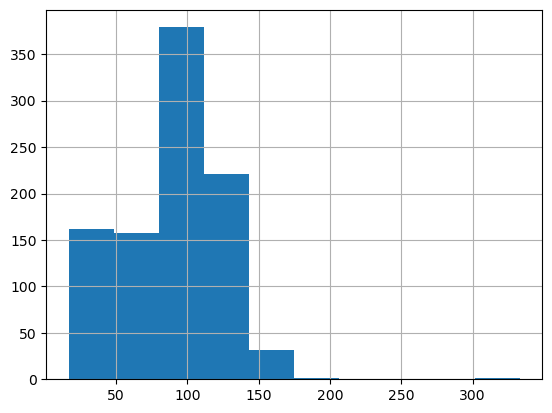

In [5]:
data['ExamName'].str.len().hist()

<AxesSubplot: >

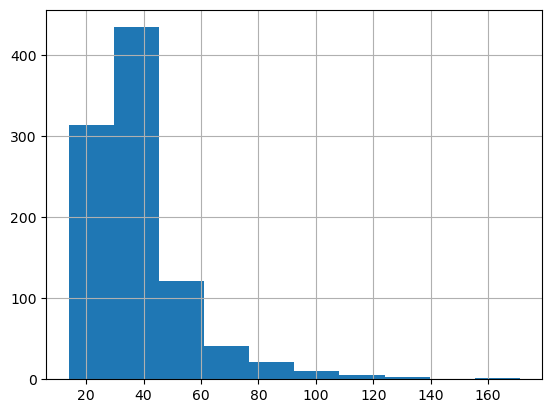

In [6]:
data['clinicaldata'].str.len().hist()

<AxesSubplot: >

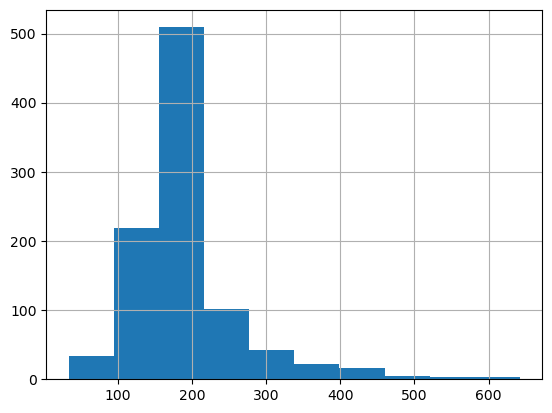

In [7]:
data['findings'].str.len().hist()

<AxesSubplot: >

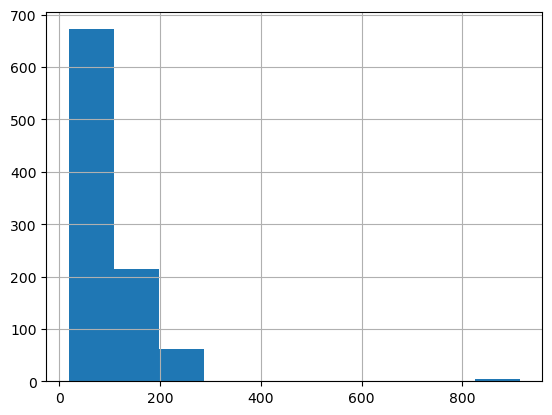

In [8]:
data['impression'].str.len().hist()

Histogram of number of words in each field

<AxesSubplot: >

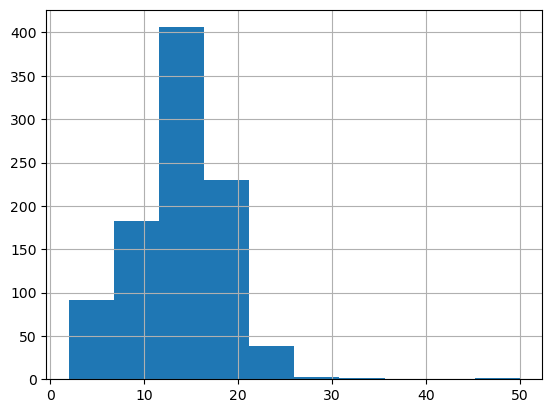

In [9]:
data['ExamName'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot: >

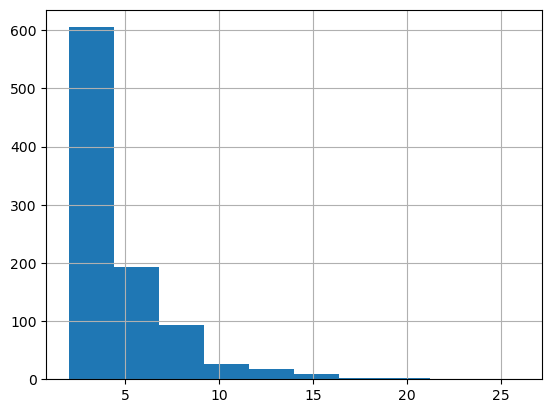

In [10]:
#must dropna here because 4 records are missing/NaN
data['clinicaldata'].dropna().str.split().map(lambda x: len(x)).hist()

<AxesSubplot: >

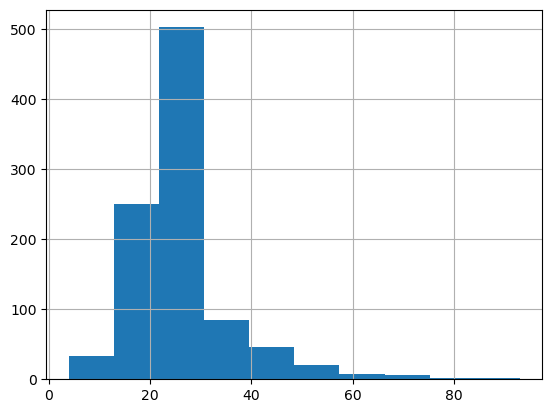

In [11]:
data['findings'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot: >

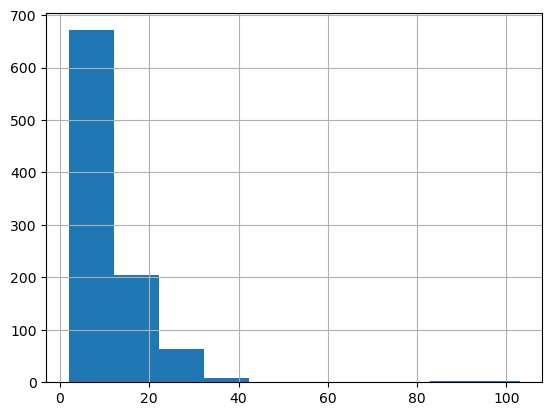

In [12]:
data['impression'].str.split().map(lambda x: len(x)).hist()

Average word length histograms

<AxesSubplot: >

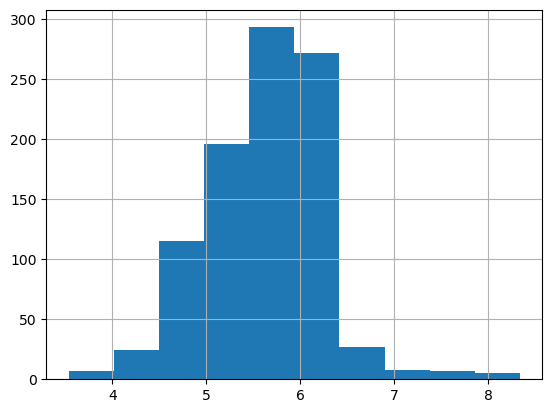

In [13]:
data['ExamName'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist()

<AxesSubplot: >

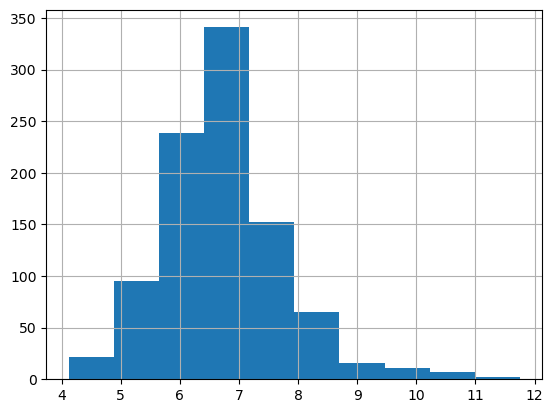

In [14]:
#dropna used here again
data['clinicaldata'].dropna().str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist()

<AxesSubplot: >

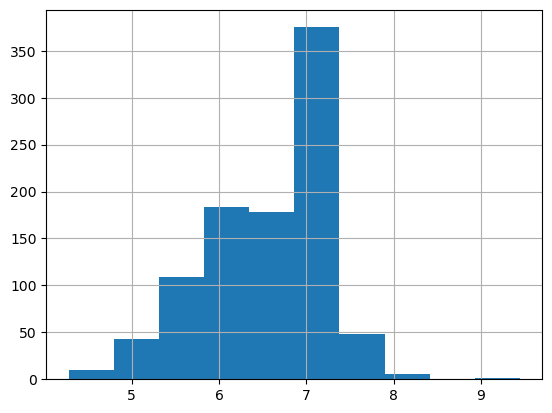

In [15]:
data['findings'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist()

<AxesSubplot: >

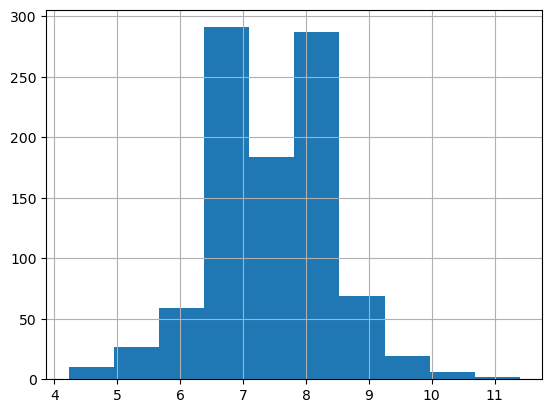

In [16]:
data['impression'].str.split().apply(\
    lambda x : [len(i) for i in x]).map(\
    lambda x: np.mean(x)).hist()

Stopwords often add no information to the text data to be analyzed, but were included in our prior summary statistics. Removing stopwords can lead to greater insights on our data.

In [17]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [36]:
#Creating corpus for each section 

namecorpus=[]
mots = data['ExamName'].str.split()
mots = mots.values.tolist()
namecorpus = [word for i in mots for word in i]

findcorpus=[]
mots = data['findings'].str.split()
mots = mots.values.tolist()
findcorpus = [word for i in mots for word in i]

clincorpus=[]
mots = data['clinicaldata'].dropna().str.split()
mots = mots.values.tolist()
clincorpus = [word for i in mots for word in i]

impcorpus=[]
mots = data['impression'].str.split()
mots = mots.values.tolist()
impcorpus = [word for i in mots for word in i]

In [37]:
#Creating stopwords dictionary for each section

from collections import defaultdict


namedic=defaultdict(int)
for word in namecorpus:
    if word in stop:
        namedic[word]+=1

finddic=defaultdict(int)
for word in findcorpus:
    if word in stop:
        finddic[word]+=1

clindic=defaultdict(int)
for word in clincorpus:
    if word in stop:
        clindic[word]+=1

impdic=defaultdict(int)
for word in impcorpus:
    if word in stop:
        impdic[word]+=1

Now we can plot the most common stopwords and non stopwords in each section

In [38]:
from collections import Counter
import seaborn as sns

<AxesSubplot: >

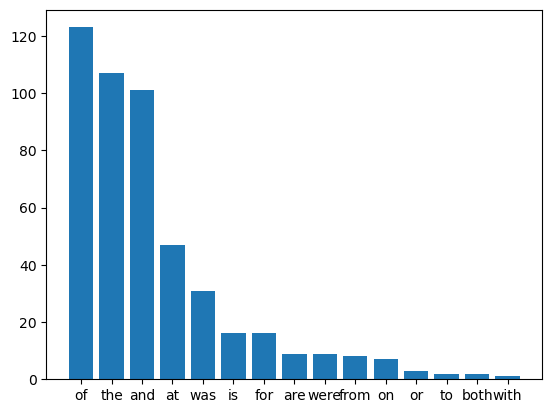

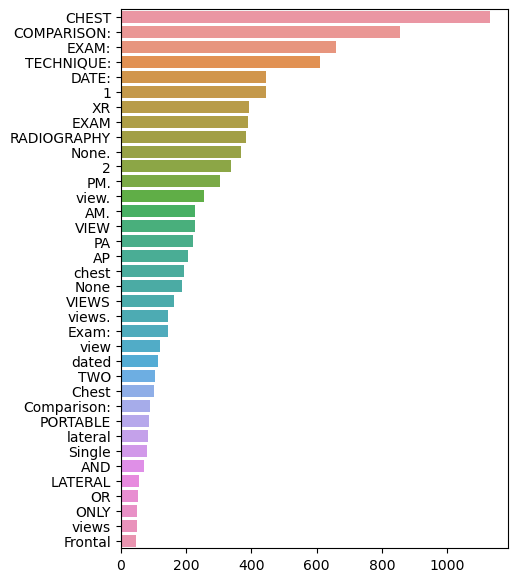

In [39]:
#Exam Name

top = sorted(namedic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
plt.bar(x,y)

counter=Counter(namecorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(5,7))        
sns.barplot(x=y,y=x)

<AxesSubplot: >

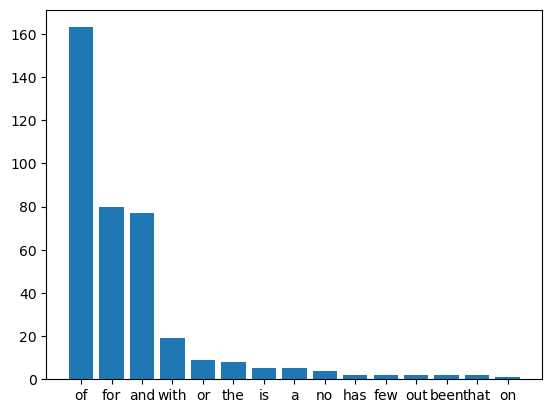

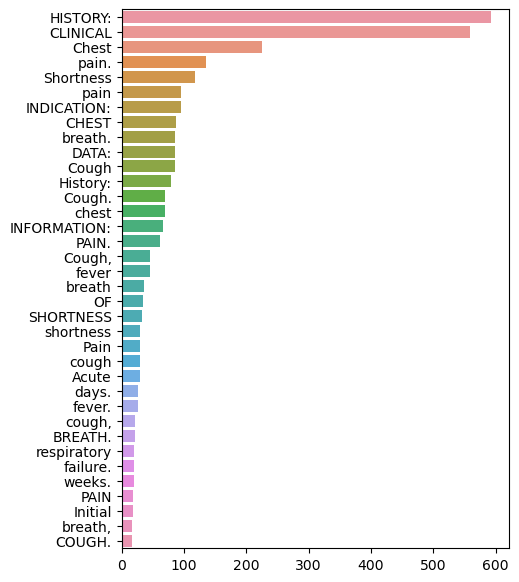

In [40]:
#Clinical data

top = sorted(clindic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
plt.bar(x,y)

counter=Counter(clincorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(5,7))        
sns.barplot(x=y,y=x)

<AxesSubplot: >

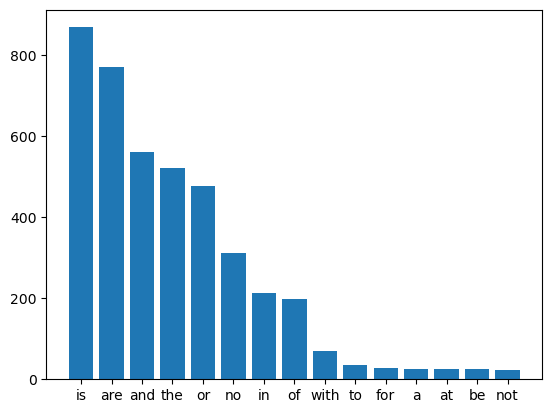

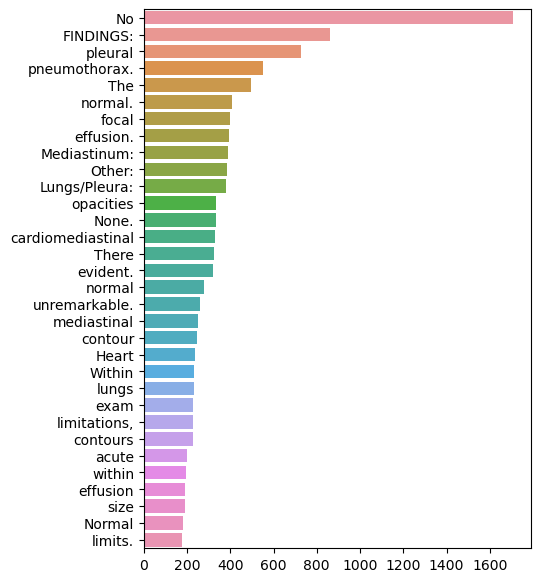

In [41]:
#Findings

top = sorted(finddic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
plt.bar(x,y)

counter=Counter(findcorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(5,7))        
sns.barplot(x=y,y=x)

<AxesSubplot: >

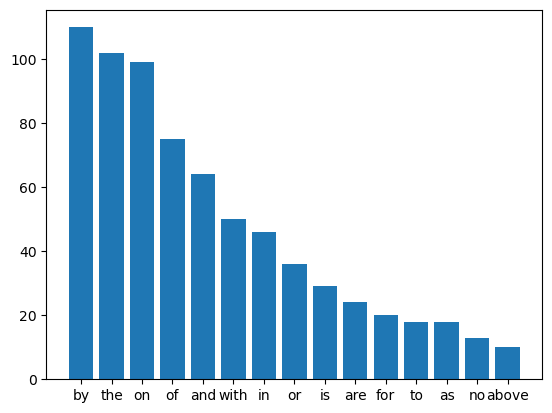

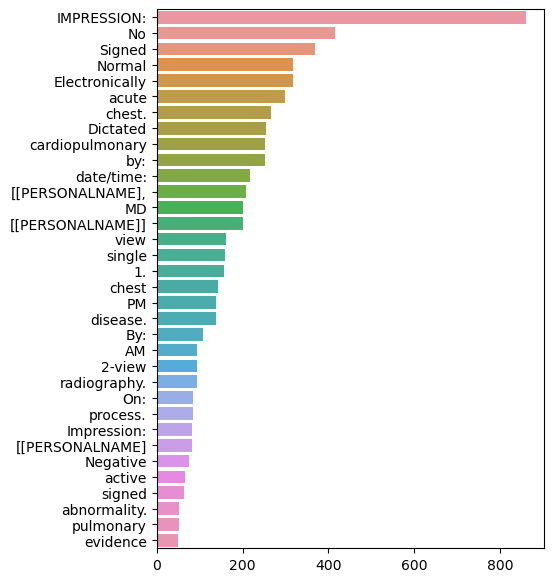

In [42]:
#Impressions

top = sorted(impdic.items(), key= lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
plt.bar(x,y)

counter=Counter(impcorpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(5,7))        
sns.barplot(x=y,y=x)

Now we will perform n-gram exploration

In [26]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
def get_top_ngram(corpus,n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit((corpus))
    bag_of_words = vec.transform((corpus))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
            for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [28]:
examname = data['ExamName']
clindata = data['clinicaldata'].dropna()
findings = data['findings']
impression = data['impression']

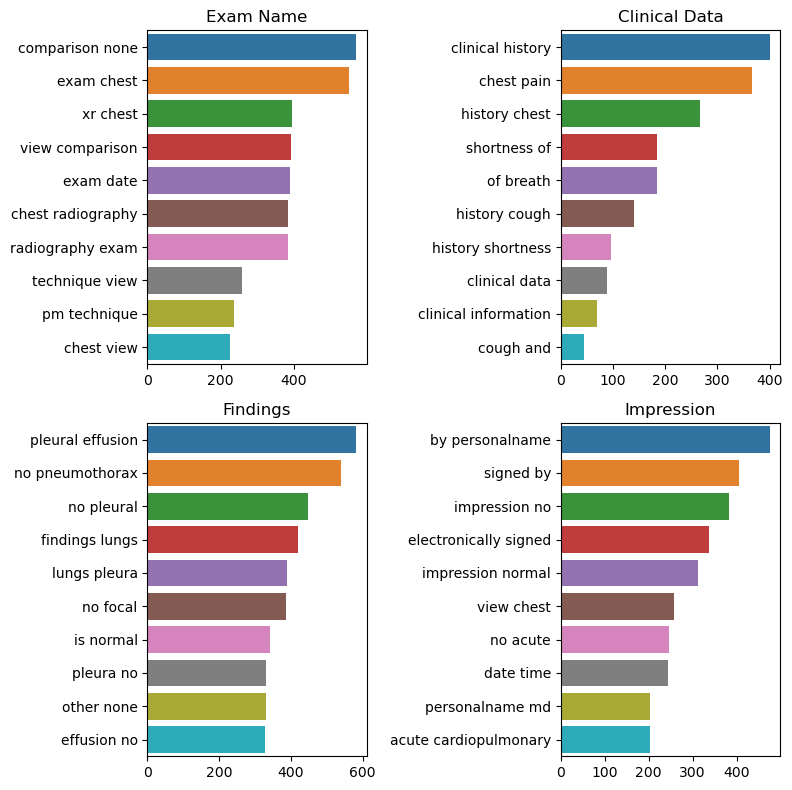

In [29]:
fig, axes = plt.subplots(2,2)

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
top_n_bigrams=get_top_ngram(examname,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[0,0],x=y,y=x)

#Clinical Data
top_n_bigrams=get_top_ngram(clindata,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[0,1],x=y,y=x)

#Findings
top_n_bigrams=get_top_ngram(findings,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[1,0],x=y,y=x)

#Impression
top_n_bigrams=get_top_ngram(impression,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(ax=axes[1,1],x=y,y=x)

fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()
plt.show()

Moving onto topic modeling exploration with pyLDAvis.

In [33]:
import nltk
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer, punkt, wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [45]:
#Preprocessing by tokenizing, lemmatizing, and removing stopwords

def preprocess(section):
    corpus= []
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for chunk in section:
        words=[w for w in word_tokenize(chunk) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

exnamecorpus=preprocess(examname)
clincorpus =preprocess(clindata)
findcorpus=preprocess(findings)
impcorpus=preprocess(impression)

In [30]:
#Creating a bag of words for each section

import gensim

exnamedic=gensim.corpora.Dictionary(exnamecorpus)
bow_exnamecorpus = [exnamedic.doc2bow(doc) for doc in exnamecorpus]

clindic=gensim.corpora.Dictionary(clincorpus)
bow_clincorpus = [clindic.doc2bow(doc) for doc in clincorpus]

finddic=gensim.corpora.Dictionary(findcorpus)
bow_findcorpus = [finddic.doc2bow(doc) for doc in findcorpus]

impdic=gensim.corpora.Dictionary(impcorpus)
bow_impcorpus = [impdic.doc2bow(doc) for doc in impcorpus]

In [31]:
#Exam Name

exnamelda_model = gensim.models.LdaMulticore(bow_exnamecorpus, 
num_topics = 4, 
id2word = exnamedic,                                    
passes = 10,
workers = 2)
exnamelda_model.show_topics()

[(0,
  '0.121*"CHEST" + 0.102*"EXAM" + 0.081*"COMPARISON" + 0.057*"DATE" + 0.049*"None" + 0.046*"view" + 0.046*"TECHNIQUE" + 0.039*"RADIOGRAPHY" + 0.036*"VIEW" + 0.026*"Exam"'),
 (1,
  '0.113*"EXAM" + 0.110*"CHEST" + 0.084*"COMPARISON" + 0.064*"TECHNIQUE" + 0.062*"view" + 0.059*"None" + 0.052*"DATE" + 0.049*"RADIOGRAPHY" + 0.042*"VIEWS" + 0.027*"TWO"'),
 (2,
  '0.052*"Chest" + 0.025*"Comparison" + 0.022*"REPORT" + 0.022*"FINAL" + 0.019*"___" + 0.015*"radiograph" + 0.011*"dated" + 0.008*"view" + 0.008*"Lateral" + 0.006*"COMPARISON"'),
 (3,
  '0.075*"chest" + 0.070*"COMPARISON" + 0.070*"TECHNIQUE" + 0.064*"CHEST" + 0.059*"view" + 0.059*"EXAM" + 0.046*"None" + 0.041*"Single" + 0.032*"VIEW" + 0.026*"available"')]

In [32]:
#Clinical Data

clinlda_model = gensim.models.LdaMulticore(bow_clincorpus, 
num_topics = 4, 
id2word = clindic,                                    
passes = 10,
workers = 2)
clinlda_model.show_topics()

[(0,
  '0.191*"HISTORY" + 0.148*"CLINICAL" + 0.080*"CHEST" + 0.078*"PAIN" + 0.072*"Shortness" + 0.068*"breath" + 0.031*"SHORTNESS" + 0.031*"BREATH" + 0.031*"History" + 0.027*"COUGH"'),
 (1,
  '0.191*"pain" + 0.171*"Chest" + 0.138*"HISTORY" + 0.112*"CLINICAL" + 0.054*"chest" + 0.039*"cough" + 0.029*"INDICATION" + 0.023*"DATA" + 0.015*"History" + 0.013*"INFORMATION"'),
 (2,
  '0.240*"HISTORY" + 0.146*"CLINICAL" + 0.103*"Cough" + 0.041*"Pain" + 0.029*"failure" + 0.023*"respiratory" + 0.022*"Acute" + 0.019*"SOB" + 0.017*"History" + 0.015*"R05"'),
 (3,
  '0.117*"CLINICAL" + 0.104*"Cough" + 0.065*"fever" + 0.062*"breath" + 0.054*"INDICATION" + 0.052*"DATA" + 0.046*"INFORMATION" + 0.040*"Shortness" + 0.032*"week" + 0.026*"day"')]

In [33]:
#Findings

findlda_model = gensim.models.LdaMulticore(bow_findcorpus, 
num_topics = 4, 
id2word = finddic,                                    
passes = 10,
workers = 2)
findlda_model.show_topics()

[(0,
  '0.058*"Mediastinum" + 0.058*"Lungs/Pleura" + 0.058*"Other" + 0.056*"effusion" + 0.056*"pneumothorax" + 0.055*"FINDINGS" + 0.055*"contour" + 0.055*"pleural" + 0.054*"opacity" + 0.052*"None"'),
 (1,
  '0.031*"FINDINGS" + 0.021*"left" + 0.020*"stable" + 0.018*"pulmonary" + 0.018*"appear" + 0.017*"pneumothorax" + 0.016*"tube" + 0.015*"chest" + 0.014*"soft" + 0.014*"tissue"'),
 (2,
  '0.027*"pulmonary" + 0.027*"tube" + 0.026*"Normal" + 0.023*"FINDINGS" + 0.022*"The" + 0.020*"tip" + 0.019*"significant" + 0.016*"There" + 0.015*"abnormality" + 0.014*"pleural"'),
 (3,
  '0.057*"normal" + 0.054*"The" + 0.050*"FINDINGS" + 0.041*"effusion" + 0.040*"pleural" + 0.038*"lung" + 0.037*"pneumothorax" + 0.034*"There" + 0.032*"size" + 0.025*"within"')]

In [34]:
#Impression

implda_model = gensim.models.LdaMulticore(bow_impcorpus, 
num_topics = 4, 
id2word = impdic,                                    
passes = 10,
workers = 2)
implda_model.show_topics()

[(0,
  '0.092*"IMPRESSION" + 0.086*"acute" + 0.085*"PERSONALNAME" + 0.066*"process" + 0.056*"cardiopulmonary" + 0.044*"Signed" + 0.029*"Electronically" + 0.016*"disease" + 0.011*"signed" + 0.010*"finding"'),
 (1,
  '0.087*"IMPRESSION" + 0.068*"PERSONALNAME" + 0.055*"Electronically" + 0.053*"Signed" + 0.051*"acute" + 0.049*"cardiopulmonary" + 0.044*"disease" + 0.023*"abnormality" + 0.019*"Impression" + 0.018*"active"'),
 (2,
  '0.179*"Dictated" + 0.150*"date/time" + 0.052*"PERSONALNAME" + 0.031*"Electronically" + 0.028*"Signed" + 0.027*"IMPRESSION" + 0.026*"CDT" + 0.019*"CST" + 0.009*"acute" + 0.008*"cardiopulmonary"'),
 (3,
  '0.153*"chest" + 0.152*"IMPRESSION" + 0.120*"Normal" + 0.062*"view" + 0.060*"single" + 0.042*"PERSONALNAME" + 0.037*"Signed" + 0.035*"2-view" + 0.035*"radiography" + 0.025*"Negative"')]

In [35]:
import pyLDAvis
import pyLDAvis.gensim_models
from imp import reload

C:\Users\ambro\AppData\Local\Temp\ipykernel_23188\1211655438.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [36]:
#Exam Name

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(exnamelda_model, bow_exnamecorpus, exnamedic)
vis

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.082391  0.040316       1        1  42.615107
1      0.100988  0.070348       2        1  35.455325
3      0.074167 -0.117351       3        1  18.749381
2     -0.257546  0.006688       4        1   3.180188, topic_info=          Term        Freq       Total Category  logprob  loglift
38       chest  216.000000  216.000000  Default  30.0000  30.0000
63       Chest  104.000000  104.000000  Default  29.0000  29.0000
41       VIEWS  147.000000  147.000000  Default  28.0000  28.0000
24  Comparison   79.000000   79.000000  Default  27.0000  27.0000
58      Single   76.000000   76.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
83       dated    3.351305  101.974491   Topic4  -4.5395   0.0329
9         view    2.633352  524.683547   Topic4  -4.7806  -1.8463
3   COMPARISON    1.841527  764.978630   Topic4  -5.1382  -2.5810
6         None    1.151815  499.845933   Topic4  -5.6075  -2.6247
69        View    0.964096   21.422925   Topic4  -5.7854   0.3472

[227 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1124      3  0.732663  01/01/2017
308       3  0.732892  01/16/2019
966       3  0.732920       01:06
448       2  0.854092       01:13
818       2  0.760709  02/15/2018
...     ...       ...         ...
9         3  0.209650        view
9         4  0.005718        view
118       1  0.756040       x-ray
118       2  0.078211       x-ray
118       3  0.156422       x-ray

[241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [38]:
#Findings

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(findlda_model, bow_findcorpus, finddic)
vis

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.008267 -0.168455       1        1  40.596720
0      0.294384  0.053435       2        1  34.340884
2     -0.179253  0.002582       3        1  13.048960
1     -0.123398  0.112438       4        1  12.013437, topic_info=            Term        Freq       Total Category  logprob  loglift
2   Lungs/Pleura  364.000000  364.000000  Default  30.0000  30.0000
6          Other  365.000000  365.000000  Default  29.0000  29.0000
4           None  322.000000  322.000000  Default  28.0000  28.0000
3    Mediastinum  373.000000  373.000000  Default  27.0000  27.0000
9        evident  306.000000  306.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
27         Lungs   18.223367   84.593364   Topic4  -4.7716   0.5840
53    silhouette   19.934199  174.755829   Topic4  -4.6819  -0.0518
5         Normal   19.221100  234.139488   Topic4  -4.7183  -0.3808
42          lung   19.336157  314.991420   Topic4  -4.7123  -0.6714
17         There   18.328989  309.714001   Topic4  -4.7658  -0.7080

[261 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
346       2  0.779192       2.9
303       3  0.931590       AND
579       2  0.515243  Anterior
243       4  0.914787    Aortic
285       3  0.961700     BONES
...     ...       ...       ...
82        1  0.977261    within
82        3  0.016379    within
82        4  0.010919    within
302       1  0.057593   without
302       3  0.921495   without

[427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:
#Clinical Data

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(clinlda_model, bow_clincorpus, clindic)
vis

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.043917  0.212089       1        1  29.141367
3     -0.199078 -0.116642       2        1  25.715564
0      0.151375 -0.086385       3        1  24.622116
2      0.091620 -0.009061       4        1  20.520953, topic_info=           Term        Freq       Total Category  logprob  loglift
7          pain  224.000000  224.000000  Default  30.0000  30.0000
5         Chest  203.000000  203.000000  Default  29.0000  29.0000
2       HISTORY  553.000000  553.000000  Default  28.0000  28.0000
1         Cough  194.000000  194.000000  Default  27.0000  27.0000
3         CHEST   80.000000   80.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
192     history    5.264449    8.461372   Topic4  -5.0511   1.1092
0      CLINICAL  120.426535  518.019436   Topic4  -1.9210   0.1248
46   Indication    5.837156   11.917648   Topic4  -4.9478   0.8699
6       History   14.359553   75.659018   Topic4  -4.0477  -0.0781
142         sob    2.861443    7.402146   Topic4  -5.6607   0.6333

[203 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
66        1  0.479726  ADDITIONAL
66        2  0.479726  ADDITIONAL
129       2  0.704743         AND
63        1  0.215399       Acute
63        2  0.107700       Acute
...     ...       ...         ...
52        2  0.932263        week
52        3  0.029133        week
18        2  0.790646     without
56        1  0.660850        year
56        4  0.220283        year

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [ ]:
#Findings

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(findlda_model, bow_findcorpus, finddic)
vis

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.008267 -0.168455       1        1  40.596720
0      0.294384  0.053435       2        1  34.340884
2     -0.179253  0.002582       3        1  13.048960
1     -0.123398  0.112438       4        1  12.013437, topic_info=            Term        Freq       Total Category  logprob  loglift
2   Lungs/Pleura  364.000000  364.000000  Default  30.0000  30.0000
6          Other  365.000000  365.000000  Default  29.0000  29.0000
4           None  322.000000  322.000000  Default  28.0000  28.0000
3    Mediastinum  373.000000  373.000000  Default  27.0000  27.0000
9        evident  306.000000  306.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
27         Lungs   18.223367   84.593364   Topic4  -4.7716   0.5840
53    silhouette   19.934199  174.755829   Topic4  -4.6819  -0.0518
5         Normal   19.221100  234.139488   Topic4  -4.7183  -0.3808
42          lung   19.336157  314.991420   Topic4  -4.7123  -0.6714
17         There   18.328989  309.714001   Topic4  -4.7658  -0.7080

[261 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
346       2  0.779192       2.9
303       3  0.931590       AND
579       2  0.515243  Anterior
243       4  0.914787    Aortic
285       3  0.961700     BONES
...     ...       ...       ...
82        1  0.977261    within
82        3  0.016379    within
82        4  0.010919    within
302       1  0.057593   without
302       3  0.921495   without

[427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [39]:
#Impressions

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(implda_model, bow_impcorpus, impdic)
vis

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.066254 -0.111460       1        1  38.513413
3     -0.258595  0.049306       2        1  28.587113
2      0.152389  0.156991       3        1  17.148716
0      0.039951 -0.094837       4        1  15.750758, topic_info=             Term        Freq       Total Category  logprob  loglift
28       Dictated  242.000000  242.000000  Default  30.0000  30.0000
3           chest  345.000000  345.000000  Default  29.0000  29.0000
37      date/time  202.000000  202.000000  Default  28.0000  28.0000
2          Normal  272.000000  272.000000  Default  27.0000  27.0000
6           acute  272.000000  272.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
44         active    5.357838   61.246556   Topic4  -5.4390  -0.5881
90     identified    3.687332   12.649878   Topic4  -5.8127   0.6155
143  interstitial    3.827350   18.941666   Topic4  -5.7754   0.2491
36            CST    3.986535   30.398243   Topic4  -5.7346  -0.1832
2          Normal    3.081792  272.420016   Topic4  -5.9921  -2.6336

[244 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
158       3  0.729284  01/02/2020
488       4  0.735186  01/08/2020
696       4  0.735181  01/10/2017
780       4  0.735191  01/18/2019
840       2  0.775290  02/04/2018
...     ...       ...         ...
13        2  0.992215        view
471       2  0.876371     wording
131       2  0.797331       x-ray
131       3  0.061333       x-ray
131       4  0.122666       x-ray

[299 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

Wordclouds

In [43]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

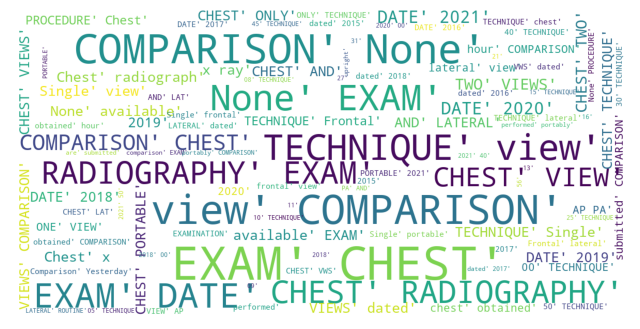

In [44]:
#Exam Name

show_wordcloud(exnamecorpus)

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

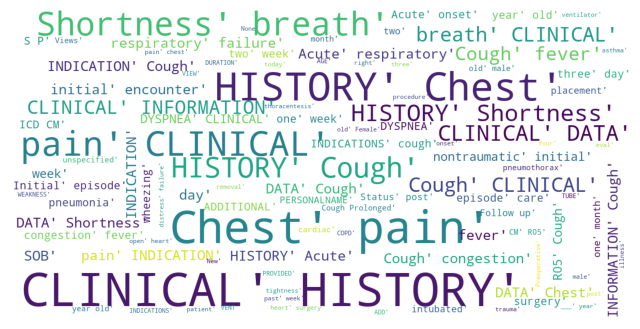

In [46]:
#Clinical Data

show_wordcloud(clincorpus)

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

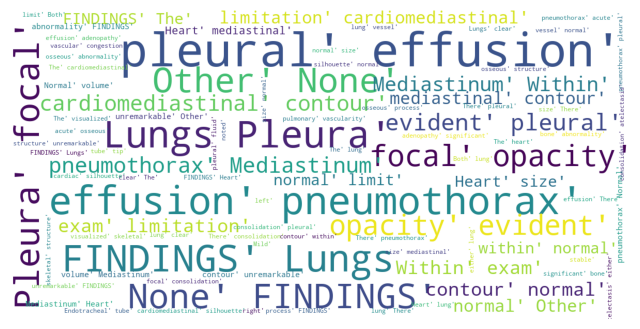

In [47]:
#Findings Data

show_wordcloud(findcorpus)

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

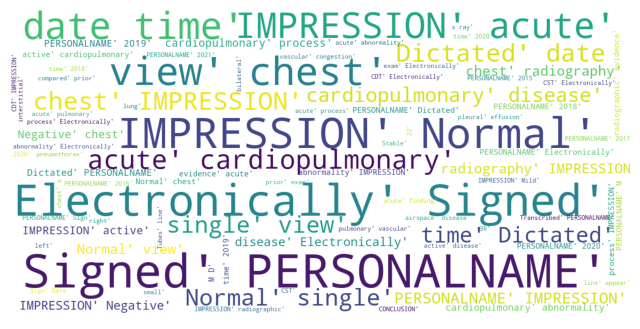

In [48]:
#Impressions

show_wordcloud(impcorpus)

Text Complexity Exploration

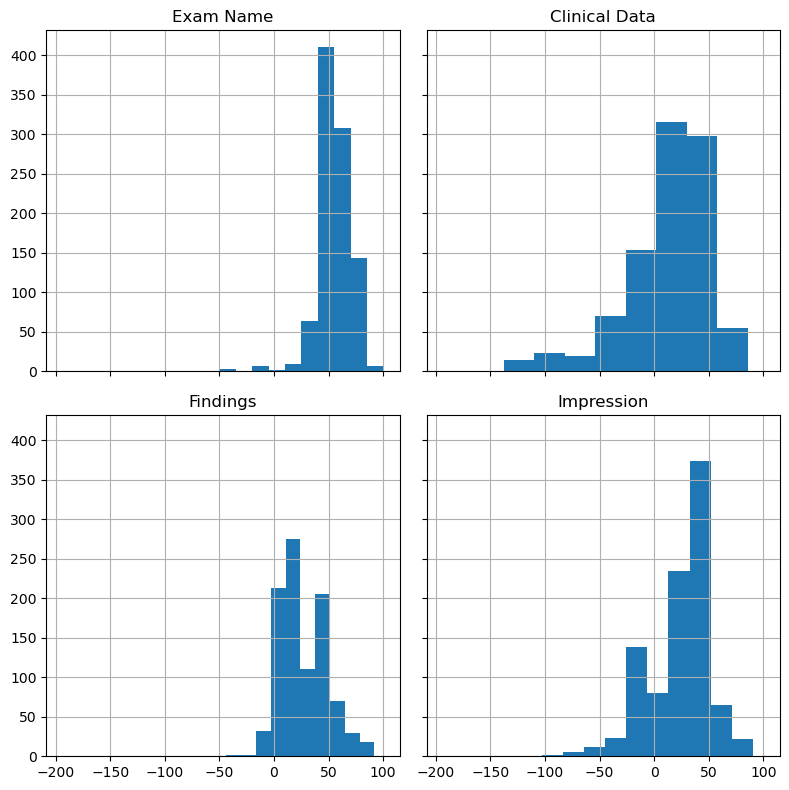

In [53]:
from textstat import flesch_reading_ease, automated_readability_index

fig, axes = plt.subplots(2,2,sharex='all', sharey='all')

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
examname.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[0,0])

#Clinical Data
clindata.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[0,1])

#Findings
findings.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[1,0])

#Impression
impression.apply(lambda x : flesch_reading_ease(x)).hist(ax=axes[1,1])

fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()
plt.show()

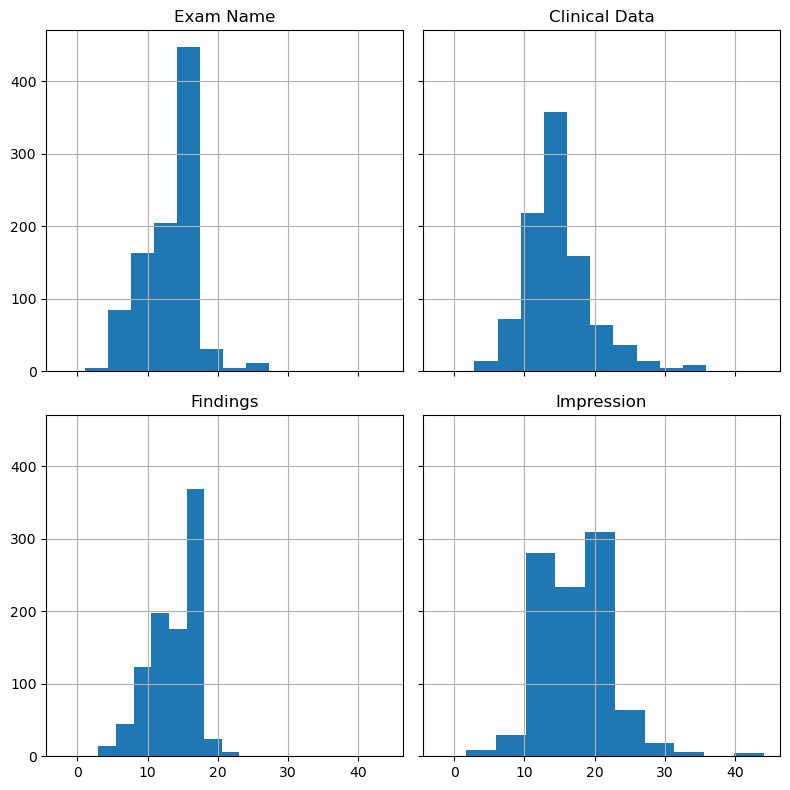

In [54]:
fig, axes = plt.subplots(2,2,sharex='all', sharey='all')

axes[0,0].set_title('Exam Name')
axes[0,1].set_title('Clinical Data')
axes[1,0].set_title('Findings')
axes[1,1].set_title('Impression')

#Exam Name
examname.apply(lambda x : automated_readability_index(x)).hist(ax=axes[0,0])

#Clinical Data
clindata.apply(lambda x : automated_readability_index(x)).hist(ax=axes[0,1])

#Findings
findings.apply(lambda x : automated_readability_index(x)).hist(ax=axes[1,0])

#Impression
impression.apply(lambda x : automated_readability_index(x)).hist(ax=axes[1,1])

fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()
plt.show()

Using both readability indexes, Clinical Data and Impressions have a greater number of difficult text than exam name and findings. Exam Name seems to be the easiest to read, which makes sense because it is very general information and lacks as much medical terminology as other sections.

In [49]:
%store exnamecorpus
%store clincorpus
%store findcorpus
%store impcorpus

Stored 'exnamecorpus' (list)
Stored 'clincorpus' (list)
Stored 'findcorpus' (list)
Stored 'impcorpus' (list)


In [48]:
%store -z